In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# USA by day

df_usa = pd.read_csv('data/usa_county_wise.csv')

In [189]:
df_usa['new_date'] = pd.to_datetime(df_usa['Date'], format='%m/%d/%y')
df_usa.dtypes

UID                        int64
iso2                      object
iso3                      object
code3                      int64
FIPS                     float64
Admin2                    object
Province_State            object
Country_Region            object
Lat                      float64
Long_                    float64
Combined_Key              object
Date                      object
Confirmed                  int64
Deaths                     int64
new_date          datetime64[ns]
dtype: object

In [190]:
df_usa['new_date'].max()

Timestamp('2020-07-27 00:00:00')

In [191]:
df_usa = df_usa[df_usa.new_date > df_usa['new_date'].max() - pd.to_timedelta("30day")]

In [200]:
df_usa

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,new_date
527720,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",6/28/20,0,0,2020-06-28
527721,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",6/28/20,247,5,2020-06-28
527722,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",6/28/20,30,2,2020-06-28
527723,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",6/28/20,47,0,2020-06-28
527724,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",6/28/20,34,0,2020-06-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1,2020-07-27
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0,2020-07-27
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23,2020-07-27
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0,2020-07-27


In [201]:
df_usa[['Date','Province_State','Lat','Long_','Confirmed']]

,Date,Province_State,Lat,Long_,Confirmed
527720,6/28/20,American Samoa,-14.271000,-170.132000,0
527721,6/28/20,Guam,13.444300,144.793700,247
527722,6/28/20,Northern Mariana Islands,15.097900,145.673900,30
527723,6/28/20,Puerto Rico,18.180117,-66.754367,47
527724,6/28/20,Puerto Rico,18.360255,-67.175131,34
...,...,...,...,...,...
627915,7/27/20,Utah,39.372319,-111.575868,347
627916,7/27/20,Utah,38.996171,-110.701396,70
627917,7/27/20,Utah,37.854472,-111.441876,2781
627918,7/27/20,Utah,40.124915,-109.517442,142


In [194]:
pip install PyShp

Note: you may need to restart the kernel to use updated packages.


In [139]:
import shapefile

In [140]:
sf = shapefile.Reader('s_22mr22/s_22mr22.shp')

In [50]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [195]:
import geopandas
geometry = geopandas.read_file('s_22mr22/s_22mr22.shp')
geometry.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [202]:
usa_name = df_usa.rename(columns ={'Province_State':'NAME'})
usa_name.head()

,UID,iso2,iso3,code3,FIPS,Admin2,NAME,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,new_date
527720,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",6/28/20,0,0,2020-06-28
527721,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",6/28/20,247,5,2020-06-28
527722,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",6/28/20,30,2,2020-06-28
527723,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",6/28/20,47,0,2020-06-28
527724,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",6/28/20,34,0,2020-06-28


In [182]:
geometry

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.240980,64.240190,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


In [199]:
58 * 30

1740

In [204]:
usa_name = usa_name.groupby(['NAME', 'Date'])['Confirmed', 'Deaths'].sum().reset_index()

/var/folders/x8/7x1682d175z0bd2jh4k8nw7r0000gn/T/ipykernel_36836/3923272252.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [205]:
for_map = geometry.merge(usa_name, on='NAME')
for_map.head()


,STATE,NAME,FIPS,LON,LAT,geometry,Date,Confirmed,Deaths
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",6/28/20,880,45
1,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",6/29/20,901,45
2,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",6/30/20,937,45
3,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",7/1/20,975,45
4,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",7/10/20,1323,49


In [209]:
df = for_map[for_map['Date'] == '6/28/20']
df.shape

(56, 9)

<AxesSubplot:>

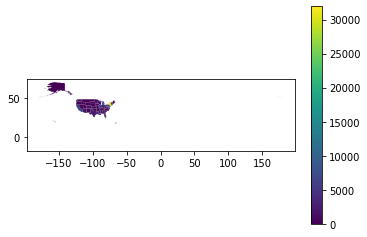

In [212]:
#df = df.groupby(['Continent'])['TotalCases'].agg(['sum']).reset_index()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

#world.plot(column='pop_est', ax=ax, legend=True)

df.plot(column='Deaths', ax=ax, legend=True, figsize=(15,10))

In [ ]:
pip install mapclassify

     |████████████████████████████████| 2.0 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.6 MB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 99.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
